In [7]:
import psycopg2
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

PostgreSQL server information
{'user': 'lhl_student', 'channel_binding': 'prefer', 'dbname': 'mid_term_project', 'host': 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'disable', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

You are connected to -  ('PostgreSQL 11.12 on x86_64-pc-linux-gnu, compiled by gcc (GCC) 4.8.3 20140911 (Red Hat 4.8.3-9), 64-bit',) 

PostgreSQL connection is closed


In [9]:
data=pd.read_csv('C:/Users/bd/lighthouse-data-notes/Week_5/Day_5/flights.txt')

In [10]:
pd.set_option('display.max_columns',100)
print(data.shape)
data.head(10)

(10000, 42)


,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-06-04,UA,UA,UA,2094,UA,N815UA,2094,12266,IAH,"Houston, TX",12953,LGA,"New York, NY",1630,1742.0,72.0,12.0,1754.0,2149.0,37.0,2102,2226.0,84.0,0,NaN,0,N,212,224.0,175.0,1,1416,9.0,0.0,12.0,0.0,63.0,NaN,NaN,NaN,NaN
1,2019-10-14,DL,DL,DL,2953,DL,N811DZ,2953,12889,LAS,"Las Vegas, NV",14869,SLC,"Salt Lake City, UT",1407,1543.0,96.0,24.0,1607.0,1803.0,5.0,1630,1808.0,98.0,0,NaN,0,N,83,85.0,56.0,1,368,96.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2019-04-26,B6,B6,B6,952,B6,N563JB,952,13204,MCO,"Orlando, FL",10721,BOS,"Boston, MA",1303,1419.0,76.0,13.0,1432.0,1705.0,10.0,1601,1715.0,74.0,0,NaN,0,N,178,176.0,153.0,1,1121,0.0,0.0,74.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2018-07-23,UA,UA_CODESHARE,UA,3433,YX,N645RW,3433,11292,DEN,"Denver, CO",11109,COS,"Colorado Springs, CO",1400,1357.0,-3.0,10.0,1407.0,1426.0,6.0,1447,1432.0,-15.0,0,NaN,0,N,47,35.0,19.0,1,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-09-25,AA,AA_CODESHARE,AA,5206,OH,N508AE,5206,11617,EWN,"New Bern/Morehead/Beaufort, NC",11057,CLT,"Charlotte, NC",911,905.0,-6.0,13.0,918.0,1004.0,10.0,1044,1014.0,-30.0,0,NaN,0,N,93,69.0,46.0,1,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-06-25,UA,UA,UA,1897,UA,N77865,1897,12892,LAX,"Los Angeles, CA",13930,ORD,"Chicago, IL",1351,1348.0,-3.0,17.0,1405.0,1928.0,28.0,2000,1956.0,-4.0,0,NaN,0,N,249,248.0,203.0,1,1744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2018-09-17,AS,AS_CODESHARE,AS,3467,OO,N183SY,3467,14893,SMF,"Sacramento, CA",14679,SAN,"San Diego, CA",1950,1935.0,-15.0,35.0,2010.0,2122.0,7.0,2125,2129.0,4.0,0,NaN,0,N,95,114.0,72.0,1,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2019-12-26,AA,AA,AA,608,AA,N809AW,608,12339,IND,"Indianapolis, IN",14107,PHX,"Phoenix, AZ",1829,1844.0,15.0,12.0,1856.0,2107.0,7.0,2040,2114.0,34.0,0,NaN,0,N,251,270.0,251.0,1,1488,0.0,0.0,19.0,0.0,15.0,NaN,NaN,NaN,NaN
8,2019-03-15,AA,AA_CODESHARE,AA,5261,OH,N594NN,5261,12339,IND,"Indianapolis, IN",11057,CLT,"Charlotte, NC",1218,1231.0,13.0,20.0,1251.0,1406.0,7.0,1401,1413.0,12.0,0,NaN,0,N,103,102.0,75.0,1,427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-07-24,AA,AA_CODESHARE,AA,5654,OH,N562NN,5654,13495,MSY,"New Orleans, LA",11057,CLT,"Charlotte, NC",1753,1752.0,-1.0,9.0,1801.0,2024.0,30.0,2110,2054.0,-16.0,0,NaN,0,N,137,122.0,83.0,1,651,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data.isnull().sum()

fl_date                    0
mkt_unique_carrier         0
branded_code_share         0
mkt_carrier                0
mkt_carrier_fl_num         0
op_unique_carrier          0
tail_num                  33
op_carrier_fl_num          0
origin_airport_id          0
origin                     0
origin_city_name           0
dest_airport_id            0
dest                       0
dest_city_name             0
crs_dep_time               0
dep_time                 159
dep_delay                166
taxi_out                 168
wheels_off               168
wheels_on                174
taxi_in                  174
crs_arr_time               0
arr_time                 172
arr_delay                190
cancelled                  0
cancellation_code       9834
diverted                   0
dup                        0
crs_elapsed_time           0
actual_elapsed_time      189
air_time                 191
flights                    0
distance                   0
carrier_delay           8091
weather_delay 

In [12]:
#Looking at data that is not null for specific delay
df=data[data['carrier_delay']>0]
matrix=df.corr()
matrix

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
mkt_carrier_fl_num,1.000000,1.000000,0.000437,0.012723,-0.009683,0.023646,0.035949,0.063865,0.011633,0.015855,-0.023676,-0.012527,0.014395,0.038624,NaN,NaN,-0.329367,-0.319839,-0.345491,NaN,-0.355335,0.035124,-0.034158,0.032135,-0.047249,0.004920,0.022883,-0.123565,-0.123565,NaN
op_carrier_fl_num,1.000000,1.000000,0.000437,0.012723,-0.009683,0.023646,0.035949,0.063865,0.011633,0.015855,-0.023676,-0.012527,0.014395,0.038624,NaN,NaN,-0.329367,-0.319839,-0.345491,NaN,-0.355335,0.035124,-0.034158,0.032135,-0.047249,0.004920,0.022883,-0.123565,-0.123565,NaN
origin_airport_id,0.000437,0.000437,1.000000,0.008146,-0.012677,0.000484,-0.047455,0.003124,0.015227,0.095936,0.080418,0.036577,0.108872,-0.032817,NaN,NaN,0.002975,0.020241,0.012234,NaN,0.033415,-0.062563,0.013276,0.067746,-0.010041,0.015561,0.096818,0.273801,0.273801,NaN
dest_airport_id,0.012723,0.012723,0.008146,1.000000,0.026705,-0.038329,0.000059,0.015040,-0.020064,-0.038841,-0.099484,-0.018661,-0.036450,0.003664,NaN,NaN,0.060945,0.063675,0.073651,NaN,0.060499,0.014102,-0.022261,-0.015771,0.026655,-0.010623,0.229891,-0.242190,-0.242190,NaN
crs_dep_time,-0.009683,-0.009683,-0.012677,0.026705,1.000000,0.733305,-0.078626,-0.031628,0.702926,0.190911,-0.008864,0.565589,0.154303,-0.076864,NaN,NaN,-0.053523,-0.048958,-0.047095,NaN,-0.048942,-0.154015,-0.039644,-0.001562,-0.003028,0.124855,0.996297,-0.117406,-0.117406,NaN
dep_time,0.023646,0.023646,0.000484,-0.038329,0.733305,1.000000,-0.069282,-0.002827,0.964322,0.378076,0.013942,0.586543,0.339467,-0.064543,NaN,NaN,-0.081695,-0.073335,-0.079842,NaN,-0.084785,-0.115199,-0.020331,0.032532,0.012907,0.062981,0.857268,0.104365,0.104365,NaN
dep_delay,0.035949,0.035949,-0.047455,0.000059,-0.078626,-0.069282,1.000000,-0.026243,-0.082622,-0.113059,-0.050423,-0.080022,-0.103766,0.980782,NaN,NaN,0.019596,-0.020486,-0.011568,NaN,0.001744,0.839908,0.035481,0.028711,0.041157,0.426816,-0.175009,0.307605,0.307605,NaN
taxi_out,0.063865,0.063865,0.003124,0.015040,-0.031628,-0.002827,-0.026243,1.000000,0.040224,0.003068,0.032445,0.021779,0.004036,0.115929,NaN,NaN,0.072887,0.231991,0.046011,NaN,0.030216,0.046482,0.058141,0.521098,-0.006957,-0.089364,0.105692,0.416227,0.416227,NaN
wheels_off,0.011633,0.011633,0.015227,-0.020064,0.702926,0.964322,-0.082622,0.040224,1.000000,0.408560,0.024848,0.561967,0.368714,-0.071086,NaN,NaN,-0.067585,-0.051625,-0.063860,NaN,-0.071908,-0.120576,-0.016097,0.058546,0.012171,0.047796,0.851117,0.127657,0.127657,NaN
wheels_on,0.015855,0.015855,0.095936,-0.038841,0.190911,0.378076,-0.113059,0.003068,0.408560,1.000000,0.050711,0.545457,0.947697,-0.107653,NaN,NaN,0.012522,0.020384,0.015750,NaN,0.006290,-0.099081,-0.011090,0.025668,-0.078045,-0.042640,0.431033,0.169052,0.169052,NaN


In [13]:
df.head(10)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-06-04,UA,UA,UA,2094,UA,N815UA,2094,12266,IAH,"Houston, TX",12953,LGA,"New York, NY",1630,1742.0,72.0,12.0,1754.0,2149.0,37.0,2102,2226.0,84.0,0,NaN,0,N,212,224.0,175.0,1,1416,9.0,0.0,12.0,0.0,63.0,NaN,NaN,NaN,NaN
1,2019-10-14,DL,DL,DL,2953,DL,N811DZ,2953,12889,LAS,"Las Vegas, NV",14869,SLC,"Salt Lake City, UT",1407,1543.0,96.0,24.0,1607.0,1803.0,5.0,1630,1808.0,98.0,0,NaN,0,N,83,85.0,56.0,1,368,96.0,0.0,2.0,0.0,0.0,NaN,NaN,NaN,NaN
14,2018-02-20,AS,AS,AS,501,AS,N527AS,501,12339,IND,"Indianapolis, IN",14747,SEA,"Seattle, WA",1835,1927.0,52.0,13.0,1940.0,2058.0,6.0,2020,2104.0,44.0,0,NaN,0,N,285,277.0,258.0,1,1866,44.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
20,2018-03-29,WN,WN,WN,39,WN,N728SW,39,11259,DAL,"Dallas, TX",12191,HOU,"Houston, TX",1600,1622.0,22.0,13.0,1635.0,1719.0,7.0,1705,1726.0,21.0,0,NaN,0,N,65,64.0,44.0,1,239,12.0,0.0,0.0,0.0,9.0,NaN,NaN,NaN,NaN
22,2019-05-28,F9,F9,F9,87,F9,N718FR,87,15016,STL,"St. Louis, MO",12889,LAS,"Las Vegas, NV",1800,1914.0,74.0,14.0,1928.0,2051.0,15.0,1934,2106.0,92.0,0,NaN,0,N,214,232.0,203.0,1,1371,26.0,0.0,18.0,0.0,48.0,NaN,NaN,NaN,NaN
38,2019-07-31,AA,AA,AA,55,AA,N749US,55,11298,DFW,"Dallas/Fort Worth, TX",13158,MAF,"Midland/Odessa, TX",2245,2.0,77.0,11.0,13.0,58.0,4.0,2352,102.0,70.0,0,NaN,0,N,67,60.0,45.0,1,309,32.0,0.0,0.0,0.0,38.0,NaN,NaN,NaN,NaN
39,2018-06-25,UA,UA_CODESHARE,UA,3419,YX,N636RW,3419,11618,EWR,"Newark, NJ",11433,DTW,"Detroit, MI",840,856.0,16.0,33.0,929.0,1056.0,6.0,1039,1102.0,23.0,0,NaN,0,N,119,126.0,87.0,1,488,16.0,0.0,7.0,0.0,0.0,NaN,NaN,NaN,NaN
50,2019-12-13,UA,UA,UA,1749,UA,N87527,1749,14771,SFO,"San Francisco, CA",13830,OGG,"Kahului, HI",1758,1917.0,79.0,18.0,1935.0,2248.0,4.0,2133,2252.0,79.0,0,NaN,0,N,335,335.0,313.0,1,2338,9.0,0.0,0.0,0.0,70.0,NaN,NaN,NaN,NaN
59,2018-08-20,AA,AA_CODESHARE,AA,4269,AX,N605KS,4269,11278,DCA,"Washington, DC",12884,LAN,"Lansing, MI",1715,1859.0,104.0,33.0,1932.0,2042.0,2.0,1907,2044.0,97.0,0,NaN,0,N,112,105.0,70.0,1,479,97.0,0.0,0.0,0.0,0.0,1715.0,55.0,55.0,NaN
60,2018-02-22,DL,DL,DL,2633,DL,N939AT,2633,11298,DFW,"Dallas/Fort Worth, TX",11433,DTW,"Detroit, MI",1519,1558.0,39.0,14.0,1612.0,1920.0,7.0,1904,1927.0,23.0,0,NaN,0,N,165,149.0,128.0,1,986,5.0,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN


In [14]:
data.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled                int64
cancellation_code       object
diverted                 int64
dup                     object
crs_elapsed_time         int64
actual_elapsed_time    float64
air_time               float64
flights                  int64
distance

In [15]:
data.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9841.000000,9834.000000,9832.000000,9832.000000,9826.000000,9826.000000,10000.000000,9828.000000,9810.000000,10000.000000,10000.000000,10000.000000,9811.000000,9809.000000,10000.0,10000.000000,1909.000000,1909.000000,1909.000000,1909.000000,1909.000000,68.000000,68.000000,68.000000,0.0
mean,2759.352300,2759.349800,12657.496600,12666.936500,1335.097500,1338.381973,9.979764,17.587368,1363.893409,1465.409831,7.660696,1486.427800,1468.522283,4.945668,0.016600,0.002300,137.288300,132.603302,107.394230,1.0,765.637100,19.828182,3.411210,15.829230,0.177580,25.353064,1268.573529,36.205882,36.205882,NaN
std,1868.459574,1868.527964,1523.846959,1521.718569,488.234134,501.402932,43.679128,10.549084,502.840044,532.340533,6.041171,518.274546,537.354919,45.881558,0.127774,0.047906,72.040376,72.190999,70.148942,0.0,592.997355,55.774994,33.875065,32.436734,3.042053,46.941018,472.070205,31.940037,31.940037,NaN
min,1.000000,1.000000,10135.000000,10135.000000,10.000000,1.000000,-30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-70.000000,0.000000,0.000000,30.000000,26.000000,14.000000,1.0,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,500.000000,6.000000,6.000000,NaN
25%,1130.750000,1130.750000,11292.000000,11292.000000,925.000000,925.000000,-6.000000,11.000000,941.000000,1050.000000,4.000000,1103.000000,1054.000000,-15.000000,0.000000,0.000000,86.000000,81.000000,57.000000,1.0,337.000000,0.000000,0.000000,0.000000,0.000000,0.000000,839.250000,16.000000,16.000000,NaN
50%,2348.000000,2348.000000,12889.000000,12889.000000,1328.000000,1332.000000,-2.000000,15.000000,1348.000000,1508.000000,6.000000,1520.000000,1511.000000,-6.000000,0.000000,0.000000,118.000000,113.000000,88.000000,1.0,596.000000,0.000000,0.000000,2.000000,0.000000,4.000000,1250.000000,26.000000,26.000000,NaN
75%,4375.000000,4373.500000,14057.000000,14027.000000,1735.000000,1743.000000,7.000000,20.000000,1759.000000,1910.000000,9.000000,1915.000000,1913.000000,7.000000,0.000000,0.000000,167.000000,162.000000,136.000000,1.0,998.000000,18.000000,0.000000,19.000000,0.000000,32.000000,1703.250000,45.250000,45.250000,NaN
max,9341.000000,9341.000000,16218.000000,16218.000000,2359.000000,2359.000000,1126.000000,158.000000,2400.000000,2400.000000,113.000000,2359.000000,2400.000000,1116.000000,1.000000,1.000000,679.000000,693.000000,658.000000,1.0,4962.000000,1116.000000,1033.000000,399.000000,75.000000,494.000000,2202.000000,198.000000,198.000000,NaN


# Looking at extreme points

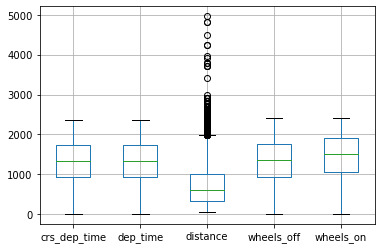

In [16]:
#plotting
graph1=data[['crs_dep_time','dep_time','distance','wheels_off','wheels_on']]
import matplotlib.pyplot as plt
graph1.boxplot()

#filtering extreme points
ext_1=graph1['distance']<4000

<AxesSubplot:>

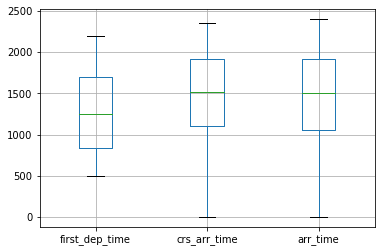

In [17]:
graph2=data[['first_dep_time','crs_arr_time','arr_time']]#,'cancelled','diverted']]
graph2.boxplot()

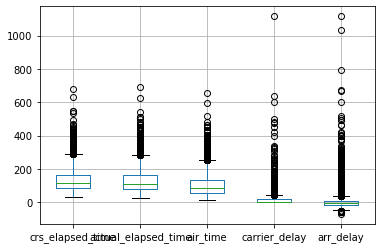

In [18]:
graph3=data[['crs_elapsed_time','actual_elapsed_time','air_time','carrier_delay','arr_delay']]
graph3.boxplot()

#filtering extreme points
ext_2=(graph3['carrier_delay']<800)&(graph3['arr_delay']<800)

<AxesSubplot:>

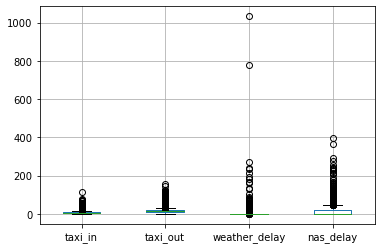

In [19]:
graph4=data[['taxi_in','taxi_out','weather_delay','nas_delay']]
graph4.boxplot()

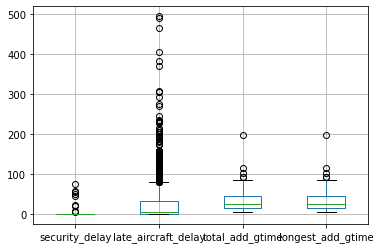

In [20]:
graph5=data[['security_delay','late_aircraft_delay','total_add_gtime','longest_add_gtime']]
graph5.boxplot()

#filtering extreme points
ext_5=graph5['late_aircraft_delay']<400

(array([ 273.,   41.,  409., 1213., 1177., 1500., 1430., 1386., 1479.,
         920.]),
 array([1.0000e+00, 2.4090e+02, 4.8080e+02, 7.2070e+02, 9.6060e+02,
        1.2005e+03, 1.4404e+03, 1.6803e+03, 1.9202e+03, 2.1601e+03,
        2.4000e+03]),
 <BarContainer object of 10 artists>)

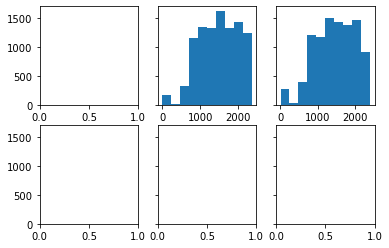

In [23]:
# Create two subplots and unpack the output array immediately
f, [[ax1, ax2,ax3],[ax4,ax5,ax6]] = plt.subplots(2, 3, sharey=True)
#ax1.hist(graph2[['taxi_in']])
ax2.hist(graph2[['crs_arr_time']])
ax3.hist(graph2[['arr_time']])
#ax4.hist(graph2[['arr_delay']])
#ax5.hist(graph2[['cancelled']])
#ax6.hist(graph2[['diverted']])

(array([1.834e+03, 5.100e+01, 1.300e+01, 4.000e+00, 4.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([   0. ,  111.6,  223.2,  334.8,  446.4,  558. ,  669.6,  781.2,
         892.8, 1004.4, 1116. ]),
 <BarContainer object of 10 artists>)

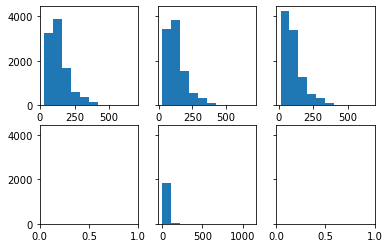

In [25]:
# Create two subplots and unpack the output array immediately
f, [[ax1, ax2,ax3],[ax4,ax5,ax6]] = plt.subplots(2, 3, sharey=True)
ax1.hist(graph3[['crs_elapsed_time']])
ax2.hist(graph3[['actual_elapsed_time']])
ax3.hist(graph3[['air_time']])
#ax4.hist(graph3[['distance']])
ax5.hist(graph3[['carrier_delay']])
